In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import glob
import os
import cv2

cam = glob.glob('./GradCam/*.jpg')
image = glob.glob('./vgg16_KIC/imagedata/*.jpg')
df = pd.read_csv('./KIc/oof_df.csv')

for vis, img , pred, label in zip(cam, image, df['preds'], df['KIc']):
    vis = cv2.imread(vis)
    img = cv2.imread(img)
    fig, axes = plt.subplots(figsize=(8, 8), ncols=2)
    axes[0].imshow(vis)
    axes[0].set_title(f"pred={pred:.4f}")
    axes[1].imshow(img)
    axes[1].set_title(f"target={label}")
    plt.colorbar()
    plt.show()

KeyboardInterrupt: 

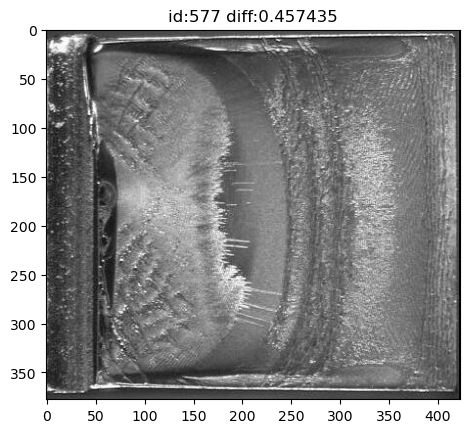

In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import glob
import os
import cv2
import os

Input = "./KIc/"
Output = "./KIc/vit_diff/"
if not os.path.exists(Output):
    os.makedirs(Output)

image = glob.glob(Input + '/vgg16_KIC/imagedata/*.jpg')
df = pd.read_csv(Input + '/oof_df.csv')
df['file_path'] = [Input + i[12:] for i in df['file_path']]
df['diff'] = round(abs(df['KIc'] - df['preds']), 6)

for i, row in df.iterrows():
    vis = cv2.imread(row['file_path']) #[:,:,::-1]
    plt.imshow(vis)
    plt.title(f"id:{row['Id']} diff:{row['diff']}")
    plt.savefig(Output + f"/{row['Id']}.jpg")
#     plt.show()
#     if i == 5: break

In [ ]:
import cv2
import os

OUTPUT_DIR = './KIc/under2/'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
    
for i, row in df[df['KIc'] < 2].iterrows():
    image = cv2.imread(str(row['file_path']))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    name = f"{row['Id']}_KIc:{row['KIc']}_Vit:{row['Vit_pred']}_VGG:{row['VGG_pred']}"
    plt.title(name)
    plt.imshow(image)
    plt.savefig(OUTPUT_DIR+name+".jpg")
    plt.show()

In [ ]:
import cv2
import os

OUTPUT_DIR = './KIc/over4.2/'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
    
for i, row in df[df['KIc'] > 4.2].iterrows():
    image = cv2.imread(str(row['file_path']))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    name = f"{row['Id']}_KIc:{row['KIc']}_Vit:{row['Vit_pred']}_VGG:{row['VGG_pred']}"
    plt.title(name)
    plt.imshow(image)
    plt.savefig(OUTPUT_DIR+name+".jpg")
    plt.show()

In [ ]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt

oof = pd.read_csv('./KIc/vgg/vgg16oof_df.csv')
oof2 = pd.read_csv('./KIc/oof_df.csv')
oof.rename(columns={'preds': 'VGG_pred'}, inplace=True)
oof2.rename(columns={'preds': 'Vit_pred'}, inplace=True)
df = pd.concat([oof[['Id', 'file_path', 'KIc', 'VGG_pred']], oof2['Vit_pred']], axis=1)

OUTPUT_DIR = './KIc/2_4.2/'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
    
for i, row in df[df['KIc'] <= 4.2][df['KIc'] >= 2].iterrows():
    image = cv2.imread(str(row['file_path']))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    name = f"{row['Id']}_KIc:{row['KIc']}_Vit:{row['Vit_pred']}_VGG:{row['VGG_pred']}"
    plt.title(name)
    plt.imshow(image)
    plt.savefig(OUTPUT_DIR+name+".jpg")
    plt.show()

In [ ]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt

oof = pd.read_csv('./KIc/vgg/vgg16oof_df.csv')
oof2 = pd.read_csv('./KIc/oof_df.csv')
oof.rename(columns={'preds': 'VGG_pred'}, inplace=True)
oof2.rename(columns={'preds': 'Vit_pred'}, inplace=True)
df = pd.concat([oof[['Id', 'file_path', 'KIc', 'VGG_pred']], oof2['Vit_pred']], axis=1)

dif = []

OUTPUT_DIR = './KIc/better_than_vgg/'
OUTPUT_DIR2 = './KIc/worse_than_vgg/'
OUTPUT_DIR3 = './KIc/better_than_vgg_top10/'
OUTPUT_DIR4 = './KIc/worse_than_vgg_top10/'

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
if not os.path.exists(OUTPUT_DIR2):
    os.makedirs(OUTPUT_DIR2)
if not os.path.exists(OUTPUT_DIR3):
    os.makedirs(OUTPUT_DIR3)
if not os.path.exists(OUTPUT_DIR4):
    os.makedirs(OUTPUT_DIR4)
    
for i, row in df.iterrows():
    dif.append(abs(row['KIc'] - row['Vit_pred']) - abs(row['KIc'] - row['VGG_pred']))
    if abs(row['KIc'] - row['Vit_pred']) < abs(row['KIc'] - row['VGG_pred']):
        image = cv2.imread(str(row['file_path']))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
        name = f"{row['Id']}_KIc:{row['KIc']}_Vit:{row['Vit_pred']}_VGG:{row['VGG_pred']}"
        plt.title(name)
        plt.imshow(image)
        plt.savefig(OUTPUT_DIR+name+".jpg")
#         plt.show()
    else :
        image = cv2.imread(str(row['file_path']))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
        name = f"{row['Id']}_KIc:{row['KIc']}_Vit:{row['Vit_pred']}_VGG:{row['VGG_pred']}"
        plt.title(name)
        plt.imshow(image)
        plt.savefig(OUTPUT_DIR2+name+".jpg")
#         plt.show()

df['dif'] = dif
df = df.sort_values('dif')
for i, row in df.head(10).iterrows():
    image = cv2.imread(str(row['file_path']))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    name = f"{row['Id']}_KIc:{row['KIc']}_Vit:{row['Vit_pred']}_VGG:{row['VGG_pred']}"
    plt.title(name)
    plt.imshow(image)
    plt.savefig(OUTPUT_DIR3+name+".jpg")
    plt.show()
    
for i, row in df.tail(10).iterrows():
    image = cv2.imread(str(row['file_path']))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    name = f"{row['Id']}_KIc:{row['KIc']}_Vit:{row['Vit_pred']}_VGG:{row['VGG_pred']}"
    plt.title(name)
    plt.imshow(image)
    plt.savefig(OUTPUT_DIR4+name+".jpg")
    plt.show()  